# Generation of capacity curves using point dispersion
This module can be used to generate many synthethic capacity curves (spectral acceleration versus spectrum displacement), starting from a median pushover curve and dispersion levels for a number of specific points on the capacity curve.The figure below presented a number of capacity curves generated from a median curve representative of a given building typology.

<img src="../../../../figures/capacity_curves_dispersion.png" height="150" width="350" align="middle">

## Random generator
The various points of the capacity curve should be defined in the vectors Sa (spectral acceleration) and Sd (spectral displacement). Then, for each of these points, it is necessary to establish the variability (in the form of a coefficient of variation), using the vector Sa_cov and Sd_cov. A normal or lognormal distribution can be considered during the sampling process. It is also necessary to define the level of correlation between the various points, using the correlation factor. A factor equal to 1 will assume a full correlation, whilst a value equal to zero will lead to an independent sampling process. The number of capacity curves that will be generated is defined in the parameter no_capacity_curves.

Actual correlation in Sa: 0.878615091151
Actual correlation in Sd: 0.672363705812
Actual correlation between Sa and Sd: 0.825557852914


point_dispersion.py:18: RuntimeWarning: covariance is not positive-semidefinite.
  sample = numpy.random.multivariate_normal(mean,covariance,1)


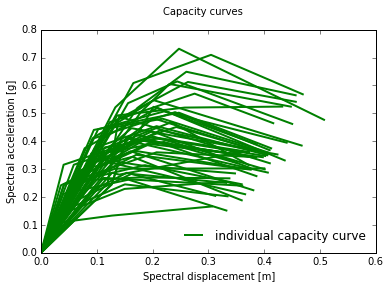

In [3]:
import point_dispersion
from rmtk.vulnerability.common import utils
%matplotlib inline 

Sa = [0.35,0.45,0.35]
Sa_cov = [0.3,0.3,0.3]
Sd =  [0.1,0.2,0.4]
Sd_cov = [0.4,0.2,0.1]
type_dist = 'normal'
Sa_corr = 0.9
Sd_corr = 0.4
SaSd_corr = 0.90
truncation = 3
no_cc = 50
capacity_curves = point_dispersion.generate_capacity_curves(Sa,Sa_cov,Sd,Sd_cov,type_dist,no_cc,Sa_corr,Sd_corr,SaSd_corr,truncation)
utils.plot_capacity_curves(capacity_curves)

## Including additional information
This module allows the introduction of additional information in the resulting capacity curves, such as: elastic period of vibration, definiton of the yielding point, participation factor or height.

In [12]:
elastic_period = 0.6
height = 3
gamma = 1.2
yielding_point_index = 1

capacity_curves = utils.add_information(capacity_curves,'periods','value',elastic_period)
capacity_curves = utils.add_information(capacity_curves,'heights','value',height)
capacity_curves = utils.add_information(capacity_curves,'gamma','value',gamma)
capacity_curves = utils.add_information(capacity_curves,'yielding point','point',yielding_point_index)

utils.save_SdSa_capacity_curves(capacity_curves,'text.csv')

In [4]:
print(Sa)

[0.35, 0.45, 0.35]


In [9]:
mean = []
for value in Sa:
    mean.append(value)
for value in Sd:
    mean.append(value)  

In [10]:
print(mean)

[0.35, 0.45, 0.35, 0.1, 0.2, 0.4]


In [17]:
import numpy
cov = []
covariance = numpy.zeros((no_points,no_points))    
for value in Sa_cov:
    cov.append(value)
for value in Sd_cov:
    cov.append(value)
no_points = len(mean)
for irow in range(no_points):
    for icol in range(no_points):
        sigma1 = mean[irow]*cov[irow] 
        sigma2 = mean[icol]*cov[icol]
        if irow == icol:
            covariance[irow][icol] = sigma1*sigma2
        else:
            if irow < no_points/2 and icol < no_points/2:
                corr =  Sa_corr
            elif irow < no_points/2 and icol >= no_points/2:
                corr =  SaSd_corr
            elif irow >= no_points/2 and icol < no_points/2:
                corr =  SaSd_corr
            elif irow >= no_points/2 and icol >= no_points/2:
                corr =  Sd_corr        
            covariance[irow][icol] = sigma1*sigma2*corr
print(sigma1)
print(sigma2)
print(cov)
print(covariance)

0.04
0.04
[0.3, 0.3, 0.3, 0.4, 0.2, 0.1]
[[ 0.011025   0.0127575  0.0099225  0.00378    0.00378    0.00378  ]
 [ 0.0127575  0.018225   0.0127575  0.00486    0.00486    0.00486  ]
 [ 0.0099225  0.0127575  0.011025   0.00378    0.00378    0.00378  ]
 [ 0.00378    0.00486    0.00378    0.0016     0.00064    0.00064  ]
 [ 0.00378    0.00486    0.00378    0.00064    0.0016     0.00064  ]
 [ 0.00378    0.00486    0.00378    0.00064    0.00064    0.0016   ]]


In [ ]:
generated_cc = 0
while generated_cc < no_cc:
        sample = numpy.random.multivariate_normal(mean,covariance,1)
        print(sample)

In [ ]:
print(no_cc)